# Project: Classification of Stars

![Hertzsprung-Russell Diagram](hr_diagram_1.png)

This project aims to classify stars based on their temperature and luminosity. The Hertzsprung-Russell Diagram above visually represents this classification, showing the relationship between a star's temperature and its luminosity.




# Project: Star Classification using Neural Networks

## Introduction

This project aims to classify stars based on their temperature and luminosity using a neural network model. The dataset used for training is `extended_training.csv`, which includes various features that correlate with a star's position in the Hertzsprung-Russell Diagram. The goal is to develop a model that can accurately predict the classification of stars, even when presented with unseen data.

In this notebook, I will begin by preprocessing the data and setting up a neural network model. I will then introduce dropout and batch normalization layers to enhance the model's performance. The model will be trained and evaluated using a range of metrics, and the results will be visualized to assess its accuracy and effectiveness.

Finally, I will explore the impact of additional features and activation functions, such as ReLU, on the model's performance. The project will conclude with an analysis of the model's predictions on both the training data and unseen test data, discussing its strengths and areas for improvement.


In [152]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

import matplotlib.pyplot as plt
import seaborn as sns


In [153]:
# Matplotlib ayarları (Latex ile)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

In [154]:
extended_df = pd.read_csv('./data/extended_training.csv')

In [155]:
extended_df.head()

,x,y,category
0,-1.716,1.172,0
1,-1.588,0.772,1
2,-0.504,-0.112,1
3,-1.324,0.332,1
4,0.920,-0.332,0


In [156]:
extended_df.shape

(10000, 3)

In [157]:
extended_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         10000 non-null  float64
 1   y         10000 non-null  float64
 2   category  10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


<Axes: >

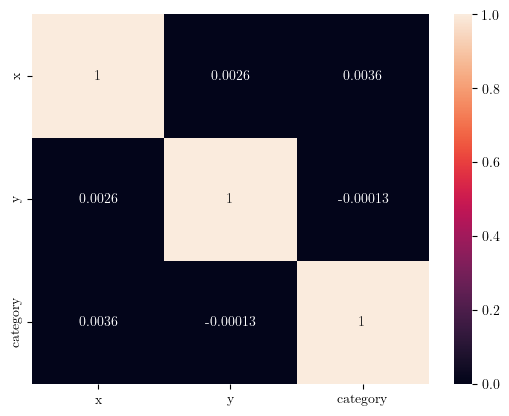

In [158]:
sns.heatmap(extended_df.corr(numeric_only=True),annot=True)

In [159]:
extended_df.describe()

,x,y,category
count,10000.000000,10000.000000,10000.00000
mean,0.002403,-0.006618,0.50590
std,1.158541,1.158847,0.49999
min,-2.000000,-2.000000,0.00000
25%,-1.004000,-1.012000,0.00000
50%,0.000000,-0.024000,1.00000
75%,1.012000,1.016000,1.00000
max,1.996000,1.996000,1.00000


In [160]:
extended_df.isnull().sum()

x           0
y           0
category    0
dtype: int64

In [161]:
coords_extended = extended_df.drop('category', axis=1)
labels_extended = extended_df['category']

In [162]:
coords_extended

,x,y
0,-1.716,1.172
1,-1.588,0.772
2,-0.504,-0.112
3,-1.324,0.332
4,0.920,-0.332
...,...,...
9995,1.456,0.832
9996,0.164,0.844
9997,1.132,1.400
9998,0.172,-1.596


In [163]:
labels_extended

0       0
1       1
2       1
3       1
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: category, Length: 10000, dtype: int64

# Genişletilmiş Veri İle Model Eğitimi

In [164]:
# Modelin oluşturulması
network = Sequential()
# Katmanlar + Batch Normalization + Dropout
network.add(Dense(1024, activation='relu', input_shape=(2,)))
network.add(BatchNormalization())
network.add(Dropout(0.5))
network.add(Dense(512, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.5))
network.add(Dense(256, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.5))
network.add(Dense(128, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.5))
network.add(Dense(64, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.5))
network.add(Dense(32, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.5))
network.add(Dense(16, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.5))

# Çıkış katmanı
network.add(Dense(1, activation='sigmoid'))

# Modelin derlenmesi
network.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy', keras.metrics.BinaryAccuracy()])

# Modelin genişletilmiş veri ile yeniden eğitilmesi (20 epoch)
history_extended = network.fit(coords_extended, labels_extended, batch_size=250, epochs=20)


Epoch 1/20


c:\Users\mawii\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4984 - binary_accuracy: 0.4984 - loss: 1.0711
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5016 - binary_accuracy: 0.5016 - loss: 0.9465
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5095 - binary_accuracy: 0.5095 - loss: 0.8898
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4908 - binary_accuracy: 0.4908 - loss: 0.8623
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5052 - binary_accuracy: 0.5052 - loss: 0.8120
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5196 - binary_accuracy: 0.5196 - loss: 0.7676
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5243 - binary_accuracy: 0.5243 - loss: 0.7439
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5209 - binary_accuracy: 0.5209 - loss: 0.7333
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5327 - binary_accuracy: 0.5327 - loss: 0.7137
Epoch 10/20
40/40 ━━━

In [165]:
# Eğitim sürecindeki kayıtların anahtarlarını inceleme
history_keys = history_extended.history.keys()
history_keys

dict_keys(['accuracy', 'binary_accuracy', 'loss'])

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mawii\AppData\Local\Temp\ipykernel_29784\2639071999.py:7: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_ylabel('Loss Function - $\mathcal{L}$')


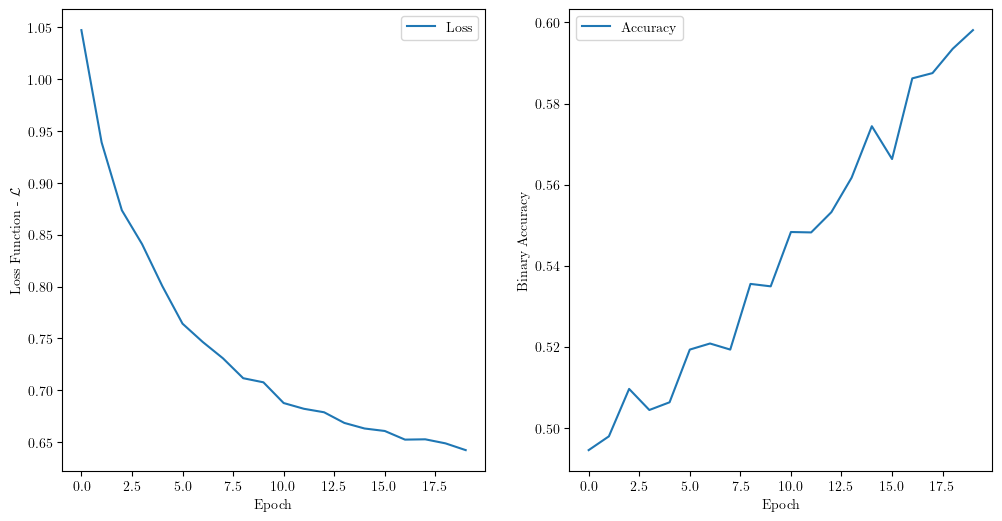

In [166]:
# Eğitim sonuçlarını görselleştirme
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(history_extended.history['loss'], label='Loss')
ax[1].plot(history_extended.history['binary_accuracy'], label='Accuracy')
ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Loss Function - $\mathcal{L}$')
ax[1].set_ylabel('Binary Accuracy')
ax[0].legend()
ax[1].legend()
plt.show()

In [167]:
# Modelin özetini görüntüleyin
network.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 1024)           │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,125,189 (8.11 MB)

 Trainable params: 707,041 (2.70 MB)

 Non-trainable params: 4,064 (15.88 KB)

 Optimizer params: 1,414,084 (5.39 MB)

# Modeli Geniş Aralıkta Test Etme

In [168]:
# Daha geniş bir grid için tahminleri hesaplama
def make_square_grid(min_val=-3, max_val=3):
    x = np.linspace(min_val, max_val, 100)
    y = x
    XX, YY = np.meshgrid(x, y, indexing='xy')

    xx = XX.flatten()
    yy = YY.flatten()
    return pd.DataFrame(data={'x': xx, 'y': yy})

In [169]:
larger_grid = make_square_grid(-3, 3)
predictions = network.predict(larger_grid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [170]:
# Tahminlerin tekilliklerini (unique values) kontrol etme
unique_predictions = np.unique(predictions)
unique_predictions

array([0.32616928, 0.32620862, 0.3262154 , ..., 0.9999992 , 0.9999993 ,
       0.9999994 ], dtype=float32)

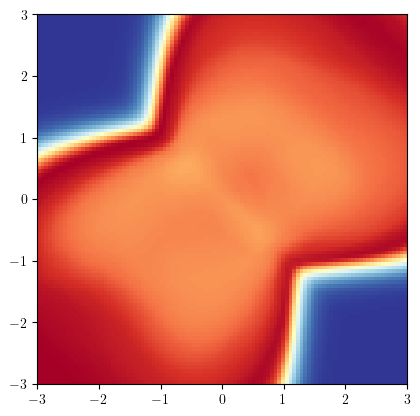

In [171]:
# Tahminlerin ısı haritası ile görselleştirilmesi
grid_vals2 = predictions.reshape((100, 100))
plt.imshow(grid_vals2, cmap='RdYlBu', extent=(-3, 3, -3, 3))
plt.show()

In [172]:
# Belirli girişler için tahminler yapma
lol = network.predict(np.array([[0.5, 0.5], [-0.5, 0.5]]))
lol

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.5146168 ],
       [0.48742616]], dtype=float32)

# Görmediği Verilere Karşı Model Performansı

In [173]:
# Görmediği verilerle performans testi için unseen_data yükleme
unseen_data = pd.read_csv('./data/unseen_test.csv')
unseen_coords = unseen_data.drop('category', axis=1)
unseen_labels = unseen_data['category']

# Modeli Yeniden Eğitip Tahminleri Görselleştirme

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


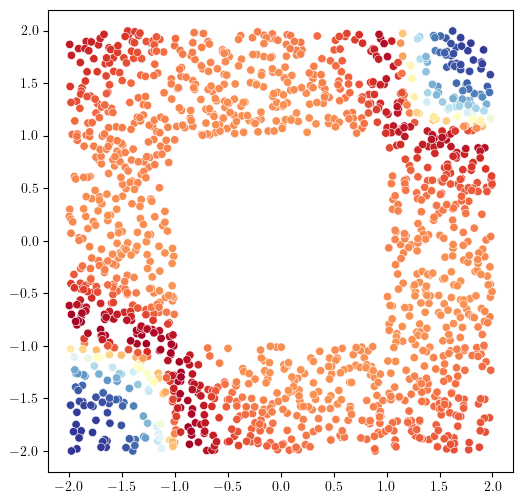

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


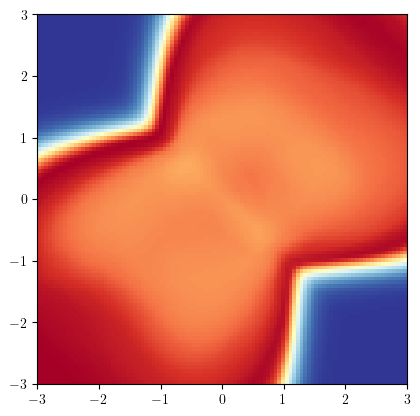

In [174]:
# Modelin yeniden eğitilmesi (sadece unseen_data ile)
#history_unseen = network.fit(unseen_coords, unseen_labels, batch_size=250, epochs=16)

# unseen_data üzerinde tahminlerin yapılması
new_pred = network.predict(unseen_coords)

# Tahminlerin scatter plot ile görselleştirilmesi
fig2, ax2 = plt.subplots(figsize=(6,6))
plt.scatter(unseen_coords['x'], unseen_coords['y'], c=new_pred, ec='w', lw=0.4, cmap='RdYlBu')
plt.show()

# Geniş grid üzerinde yeni tahminlerin görselleştirilmesi
new_prediction = network.predict(make_square_grid(-3, 3)).reshape((100, 100))
plt.imshow(new_prediction, cmap='RdYlBu', extent=(-3, 3, -3, 3))
plt.show()

In this project, I added dropout and batch normalization layers to the neural network model trained on the extended_training.csv dataset. I trained the model for 20 epochs and observed a decrease in the loss function while the accuracy improved. The model was tested on a wide grid range and on the unseen_test.csv dataset. While it performed well in some areas, it showed uncertainty in classification, particularly with new data.

If I needed to use additional features beyond xxx and yyy for classifying stars, I would include photometric and spectral data such as temperature, spectral type, luminosity, and surface gravity. These additional features could be physically more meaningful and potentially improve classification accuracy. I understand that the ReLU activation function is superior to the sigmoid function because it enables faster learning and helps prevent the vanishing gradient problem.